# <font color=#F39C12> Amazon customer behavior Analysis </font>



##  <font color = #2E4053> Problem Statement </font>

<font color = #566573> The task is to analyze Amazon customer behavior data and provide valuable insights to help our client, Amazon, understand and improve customer engagement, satisfaction, and retention. The goal is to identify patterns, trends, and potential pain points in customer behavior, allowing Amazon to make data-driven decisions to enhance the overall customer experience and drive business growth.</font>

##  <font color = #2E4053> Objectives </font>

1. **Customer Segmentation**: Identify distinct customer segments based on their behavior, preferences, and purchase patterns. This segmentation will enable Amazon to tailor marketing strategies and personalized recommendations for different customer groups.

2. **Purchase Patterns**: Understand the frequency and size of customer purchases to identify high-value customers, frequent buyers, and areas of potential revenue growth.

3. **Product Affinity Analysis**: Determine which products are often purchased together, i.e., product co-occurrence analysis, to optimize cross-selling opportunities and improve product recommendations.

4. **Customer Churn Analysis**: Investigate customer churn rates and factors leading to customer attrition. Pinpoint the characteristics of customers most likely to churn to develop targeted retention strategies.

5. **Sentiment Analysis**: Perform sentiment analysis on customer reviews and feedback to gauge overall customer satisfaction, identify areas for improvement, and monitor the impact of changes in business practices.

6. **Time Series Analysis**: Analyze customer behavior over time to identify seasonal trends, changes in purchase patterns, and potential triggers for customer engagement.

In [144]:
### Installing libraries

In [145]:
# Importing libraries for data wrangling
import numpy as np
import pandas as pd

#importing libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [146]:
### Importing DATA

In [147]:
Dataset = pd.read_csv(r'C:\Users\ADMIN\Downloads\Amazon Customer Behavior Survey.csv')
Dataset.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


### <font color = #2E4053> Data Understanding  </font>

In [148]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               602 non-null    object
 1   age                                     602 non-null    int64 
 2   Gender                                  602 non-null    object
 3   Purchase_Frequency                      602 non-null    object
 4   Purchase_Categories                     602 non-null    object
 5   Personalized_Recommendation_Frequency   602 non-null    object
 6   Browsing_Frequency                      602 non-null    object
 7   Product_Search_Method                   600 non-null    object
 8   Search_Result_Exploration               602 non-null    object
 9   Customer_Reviews_Importance             602 non-null    int64 
 10  Add_to_Cart_Browsing                    602 non-null    object
 11  Cart_C

>**Note**:  

In [149]:
Dataset.shape

(602, 23)

In [150]:
Dataset.describe()

,age,Customer_Reviews_Importance,Personalized_Recommendation_Frequency,Rating_Accuracy,Shopping_Satisfaction
count,602.000000,602.000000,602.000000,602.000000,602.000000
mean,30.790698,2.480066,2.699336,2.672757,2.463455
std,10.193276,1.185226,1.042028,0.899744,1.012152
min,3.000000,1.000000,1.000000,1.000000,1.000000
25%,23.000000,1.000000,2.000000,2.000000,2.000000
50%,26.000000,3.000000,3.000000,3.000000,2.000000
75%,36.000000,3.000000,3.000000,3.000000,3.000000
max,67.000000,5.000000,5.000000,5.000000,5.000000


>**Note**: From the description of the data we can understand that the dataset inclined towards categorical data

### <font color = #2E4053> Data Cleaning </font>

In [151]:
Dataset.isnull().sum()

Timestamp                                 0
age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     2
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas               

>**Note**: As the null values in [Product_Search_Method] are too less, Since this is a categorical field and the number of missing values are less, we can use mode to handle the missing values.

>*So we replace the blank values with the most frequent value.*

In [152]:
### Making a copy of original dataset
data = Dataset

In [153]:
data.Product_Search_Method.mode()

0    categories
Name: Product_Search_Method, dtype: object

In [154]:
data.Product_Search_Method.value_counts()

categories    223
Keyword       214
Filter        127
others         36
Name: Product_Search_Method, dtype: int64

>**Note**: We can fill blank values with 'Categories' value

In [155]:
data["Product_Search_Method"]=data["Product_Search_Method"].fillna(data["Product_Search_Method"].mode()[0])

In [156]:
data.isnull().sum()

Timestamp                                 0
age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     0
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas               

In [157]:
### converting Timestamp (class = object) into Datetime format

data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [158]:
data.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023-06-04 13:28:19-05:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023-06-04 14:30:44-05:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023-06-04 17:04:56-05:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023-06-04 17:13:00-05:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023-06-04 17:28:06-05:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


In [159]:
 data['Date'] = data['Timestamp'].dt.date

In [160]:
data.head()
data.drop(columns = ['Timestamp'])

,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,Add_to_Cart_Browsing,...,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas,Date
0,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,Yes,...,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste,2023-06-04
1,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,Yes,...,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste,2023-06-04
2,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,Yes,...,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy,2023-06-04
3,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,Maybe,...,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy,2023-06-04
4,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,Yes,...,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy,2023-06-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,23,Female,Once a week,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,4,Maybe,...,Yes,Moderately,Sometimes,3,Sometimes,3,4,Competitive prices,Customer service responsiveness,2023-06-12
598,23,Female,Once a week,Clothing and Fashion,Sometimes,Few times a week,Filter,Multiple pages,3,Maybe,...,Yes,Heavily,Sometimes,3,Sometimes,3,3,Product recommendations,Reducing packaging waste,2023-06-12
599,23,Female,Once a month,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,3,Maybe,...,Yes,Occasionally,Sometimes,3,Sometimes,2,3,Wide product selection,Product quality and accuracy,2023-06-12
600,23,Female,Few times a month,Beauty and Personal Care;Clothing and Fashion;...,Yes,Few times a month,Keyword,Multiple pages,1,Yes,...,No,Heavily,Yes,2,Yes,2,2,Wide product selection,Product quality and accuracy,2023-06-12


### <font color = #2E4053> Customer Segmentation</font>

>**Note**: Under this segment we will pass through Behovarial variables to gather insights   

In [161]:
pdt = data['Gender'].value_counts()
bdt = data['Browsing_Frequency'].value_counts()
palette = ['#000000','#4E4FEB','#068FFF','#EEEEEE']
bar_categories = ['weekly','monthly','Rarely','Multiple times a day']


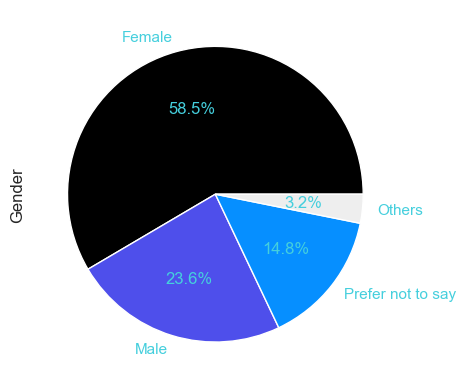

In [162]:
# Distribution of buyer on basis of gender 

data['Gender'].value_counts().plot.pie(colors = palette,autopct='%1.1f%%', textprops={'color':"#45CFDD"})
plt.show()

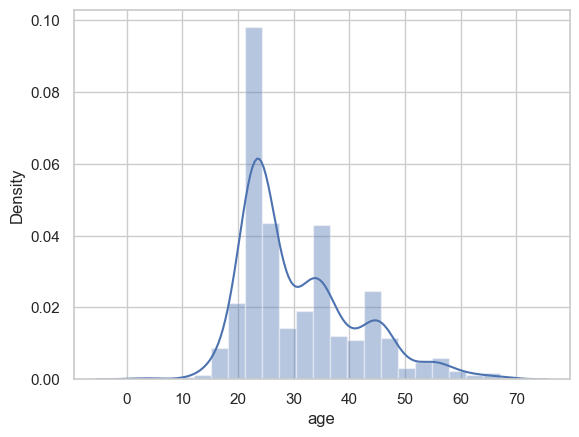

In [163]:
# Age distribution

sns.distplot(data['age'])
plt.show()

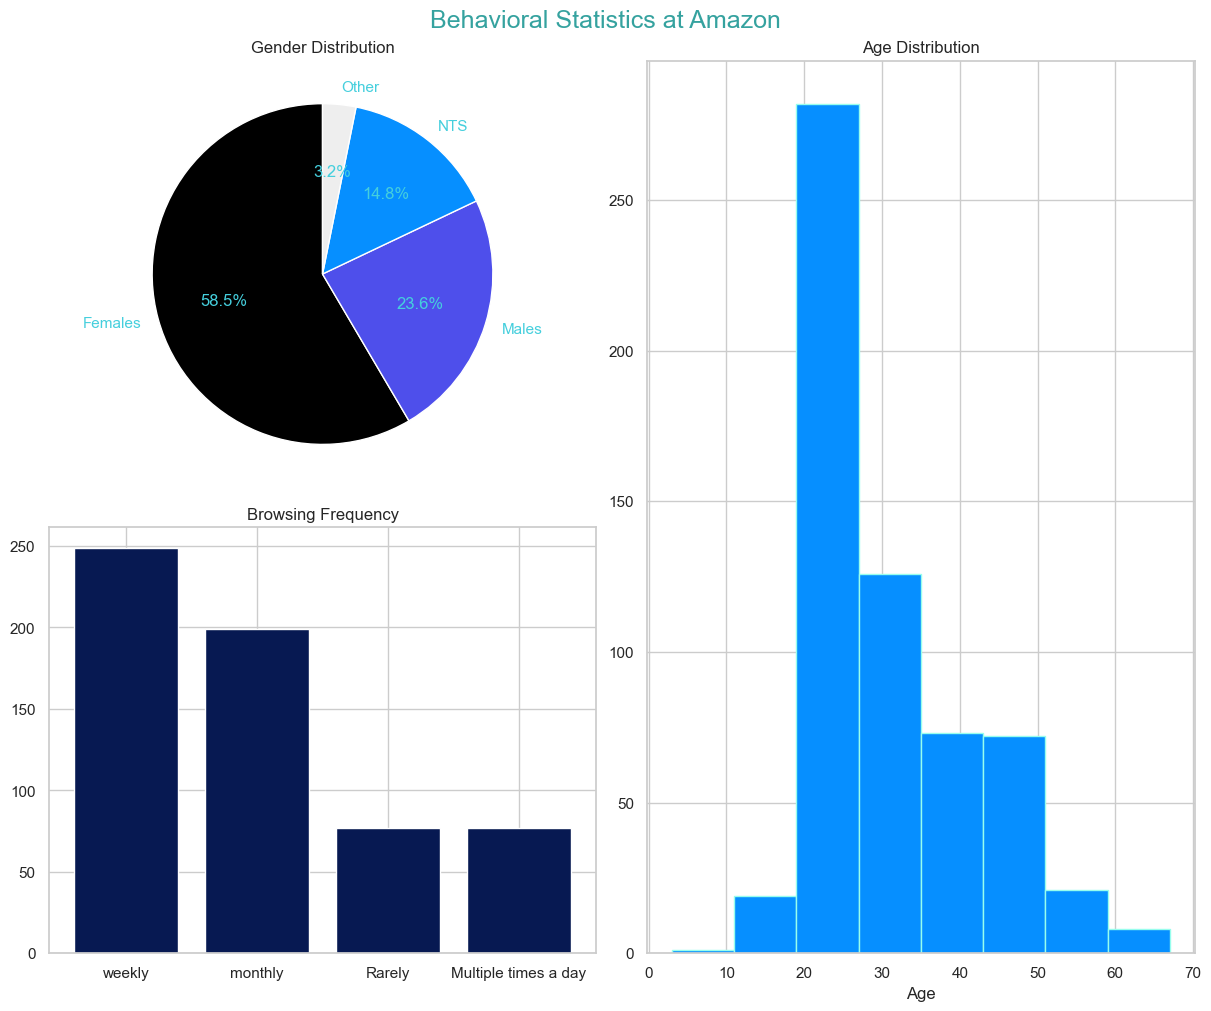

In [164]:
import matplotlib.pyplot as plt


# Increase the figure size by setting the 'figsize' parameter (width, height) in inches
fig, axd = plt.subplot_mosaic([['upleft', 'right'], ['lowleft', 'right']], layout='constrained', figsize=(12, 10))

# Plot pie chart for Gender Distribution
axd['upleft'].pie(pdt, labels=['Females', 'Males', 'NTS', 'Other'], autopct='%1.1f%%', startangle=90 , colors = palette, textprops={'color':"#45CFDD"})
axd['upleft'].set_title('Gender Distribution')

    
# Plot bar chart for Browsing Frequency
axd['lowleft'].bar(bar_categories, bdt, color='#071952')
axd['lowleft'].set_title('Browsing Frequency')

# Plot histogram for Age Distribution
axd['right'].hist(data['age'], bins=8, edgecolor ='#97FEED', color='#068FFF')
axd['right'].set_title('Age Distribution')
axd['right'].set_xlabel('Age')

# Add an overall title for the entire figure
plt.suptitle('Behavioral Statistics at Amazon', fontsize=18, color = "#35A29F")


plt.show()


>**Observation :** From the visuallization we can see that:
        
   1. Females are **58.5%** and males are **23.6%** buyers.  
   2. Most of the costumers are from age ranging from early **20s to late 40s**. 
   3. Majority of the costumers visits **Weekly** to the website. 
        
        **So Amazon's main costumer segments are concentrated among womens in their 20s - 40s**

In [165]:
dev = data['Purchase_Categories'].unique()

>**Note**: As most of the product are lapped under more than one category, Therefore we will gather insight on most popular product category combination as well as individual category. 

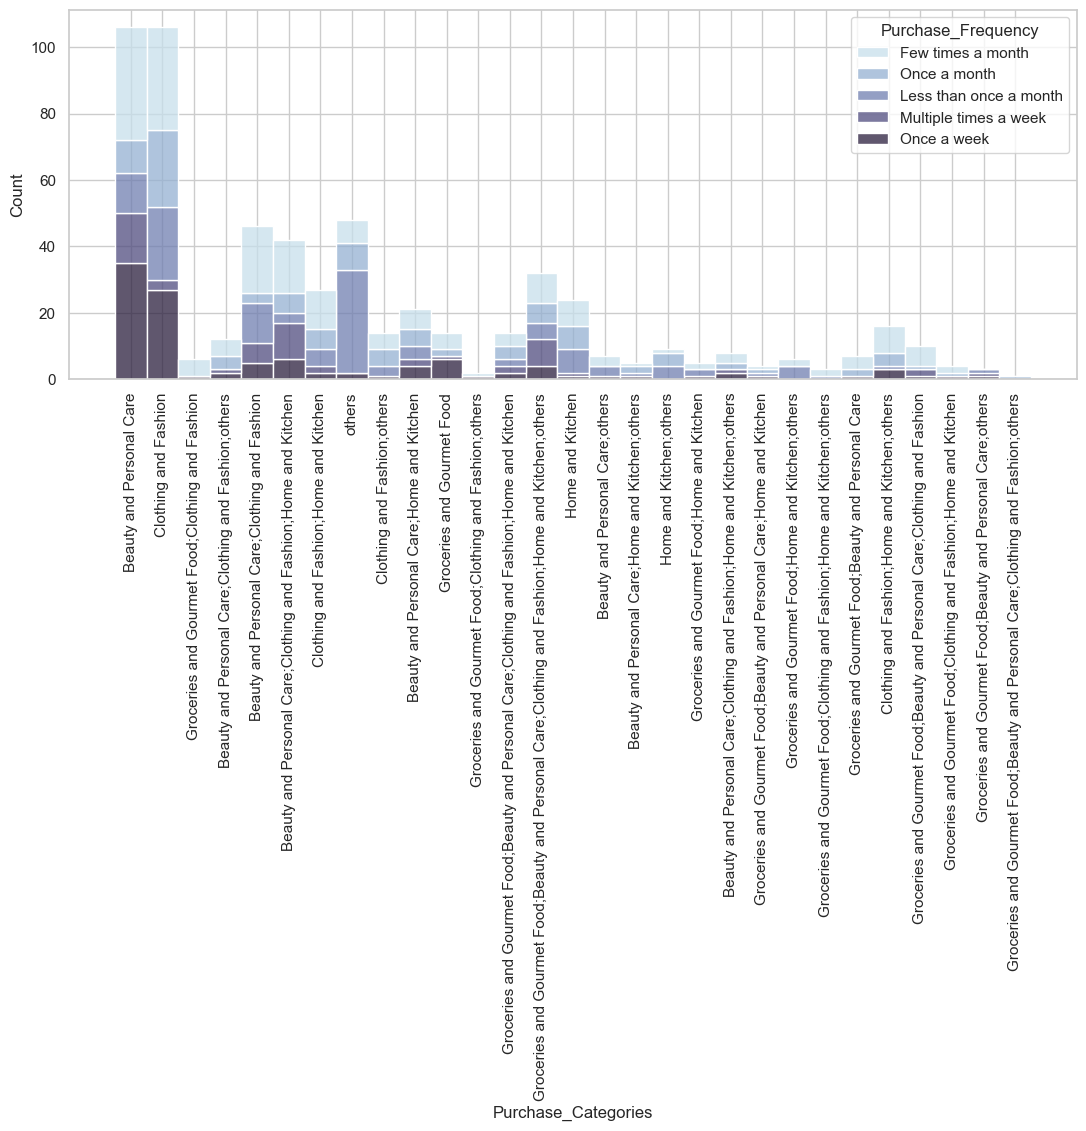

In [166]:
### Finding relation between Popular Product category and frequency of its purchace

plt.figure().set_figwidth(13)
gs = sns.histplot(binwidth=0.5, x="Purchase_Categories", hue="Purchase_Frequency", data=data, stat="count", multiple="stack", palette = "ch:s=.25,rot=-.25")
gs.set_xticklabels(labels = dev,rotation=90)
plt.show()

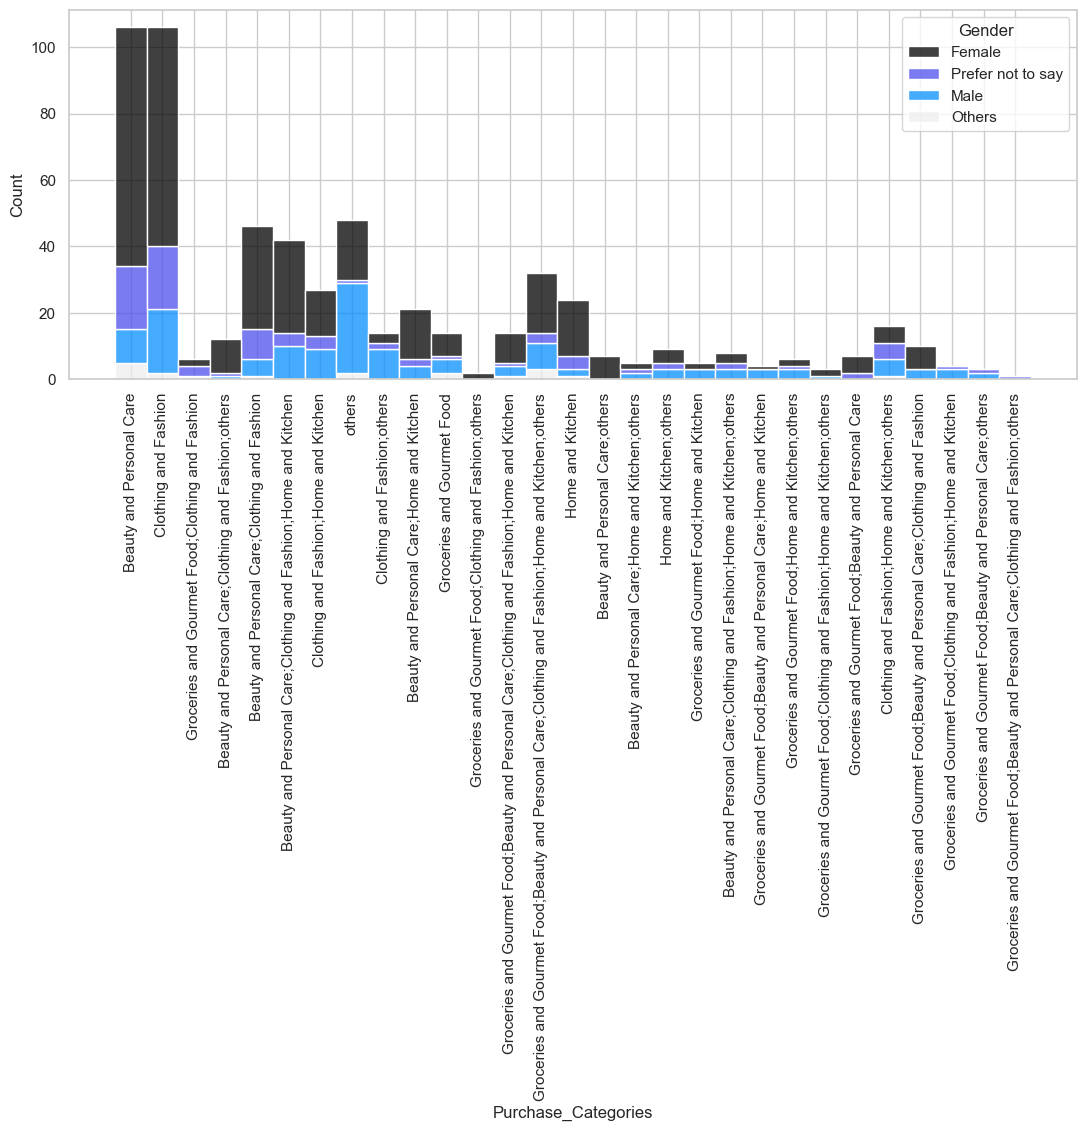

In [167]:
plt.figure().set_figwidth(13)
gs = sns.histplot(binwidth=0.5, x="Purchase_Categories", hue="Gender", data=data, stat="count", multiple="stack", palette = palette)
gs.set_xticklabels(labels = dev,rotation=90)
plt.show()

>**Note**: The visualization obtain indicates that :
1. Most of customers are invested in **"Beauty and Personal Care" & "Clothing and Fashion" category**.
2. Customers are more likely to purchases **few times a month to once a week**.
3. Most of customer segmentation is dominated by **Women**

###   <font color = #2E4053>Purchase Patterns</font>

In [168]:
data.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas,Date
0,2023-06-04 13:28:19-05:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste,2023-06-04
1,2023-06-04 14:30:44-05:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste,2023-06-04
2,2023-06-04 17:04:56-05:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy,2023-06-04
3,2023-06-04 17:13:00-05:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy,2023-06-04
4,2023-06-04 17:28:06-05:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy,2023-06-04


In this segment we will look into patterns that consistent in customer behavior regarding Viewing a product to actually buying the product.

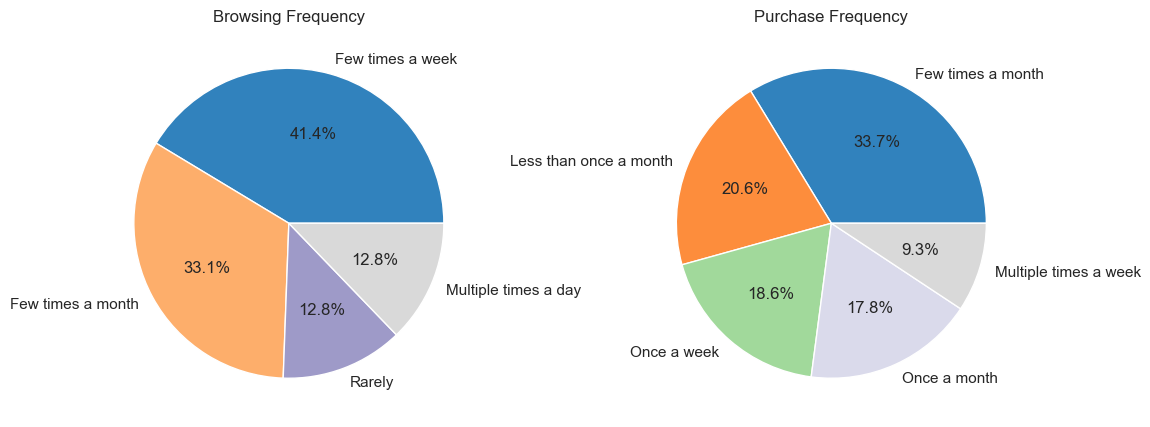

In [169]:

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot the pie chart for 'Browsing_Frequency'
data['Browsing_Frequency'].value_counts().plot.pie(ax=ax[0], autopct='%1.1f%%', cmap = "tab20c")
ax[0].set_title('Browsing Frequency')
ax[0].set_ylabel('')

# Plot the pie chart for 'Purchase_Frequency'
data['Purchase_Frequency'].value_counts().plot.pie(ax=ax[1], autopct='%1.1f%%', cmap = "tab20c")
ax[1].set_title('Purchase Frequency')
ax[1].set_ylabel('')

# Adjust the space between the two subplots
plt.subplots_adjust(wspace=0.4)

# Show the plot
plt.show()

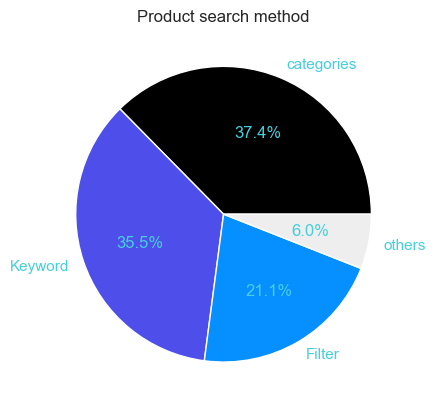

In [170]:
### Analyze the preferred product search methods 

search_type = data['Product_Search_Method'].value_counts().plot.pie(colors = palette,  autopct='%1.1f%%',  textprops={'color':"#45CFDD"})
search_type.set_ylabel('')
search_type.set_title('Product search method')
plt.show()

>**Observation**: Most of the customer prefer categorical shopping followed by keyword, Suggesting that customer browse through predicided section only.

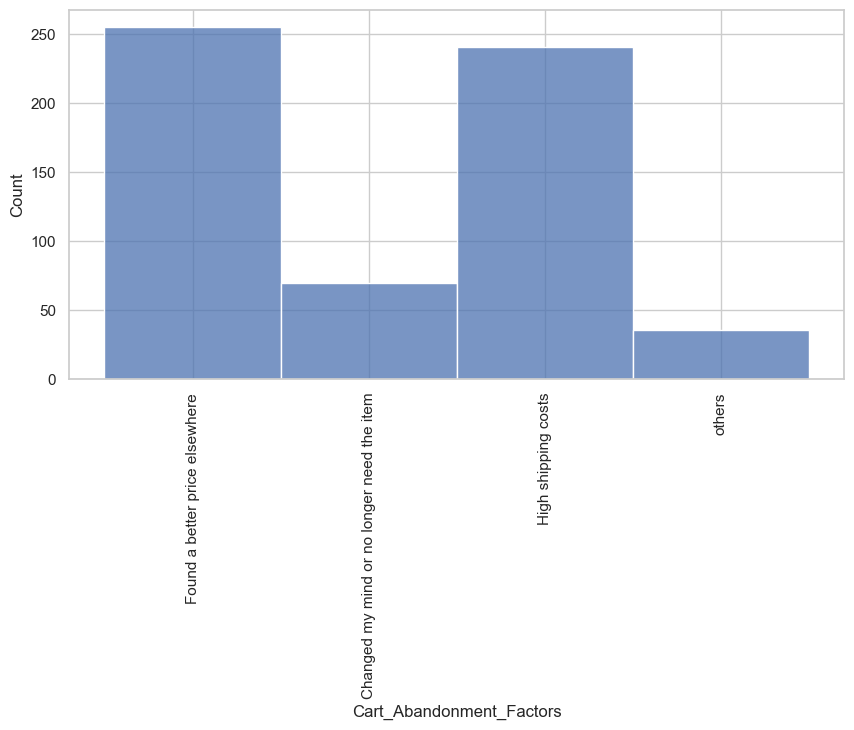

In [171]:
### Investigate the factors influencing cart abandonment 

plt.figure().set_figwidth(10)
Abond = sns.histplot(binwidth=0.5, x="Cart_Abandonment_Factors", data=data, stat="count", multiple="stack", palette = 'ch:s=.25,rot=-.25' )
Abond.set_xticklabels(labels = ['Found a better price elsewhere','Changed my mind or no longer need the item',"High shipping costs","others"],rotation=90)

plt.show()


>**Observations**: Customers finding competative product pricing on Amazon campared to other marketplaces along with High shipping prices leds to Abandonment of cart.

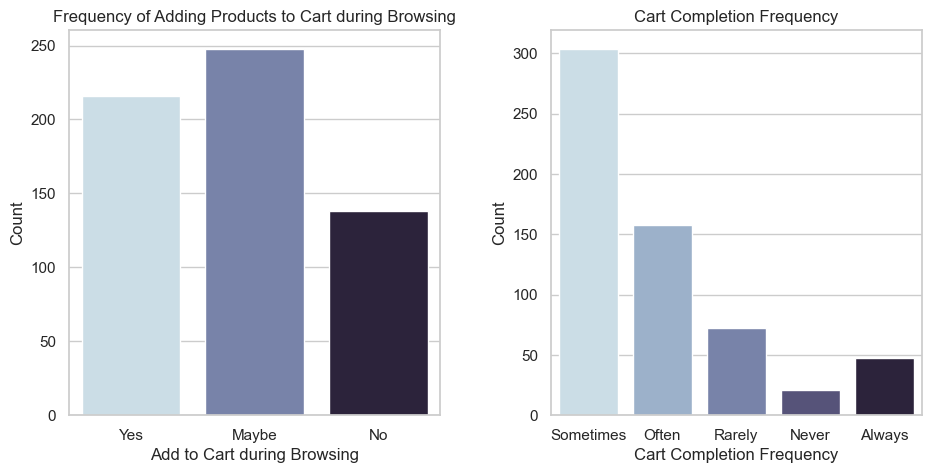

In [172]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))

# Plot the bar plot for 'Add_to_Cart_Browsing'
sns.countplot(x='Add_to_Cart_Browsing', data=data, ax=ax1, palette='ch:s=.25,rot=-.25')
ax1.set_xlabel('Add to Cart during Browsing')
ax1.set_ylabel('Count')
ax1.set_title('Frequency of Adding Products to Cart during Browsing')

# Plot the bar plot for 'Cart_Completion_Frequency'
sns.countplot(x='Cart_Completion_Frequency', data=data, ax=ax2, palette='ch:s=.25,rot=-.25')
ax2.set_xlabel('Cart Completion Frequency')
ax2.set_ylabel('Count')
ax2.set_title('Cart Completion Frequency')

# Adjust the space between the two subplots
plt.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()


###   <font color = #2E4053> Personalization and Recommendations</font>

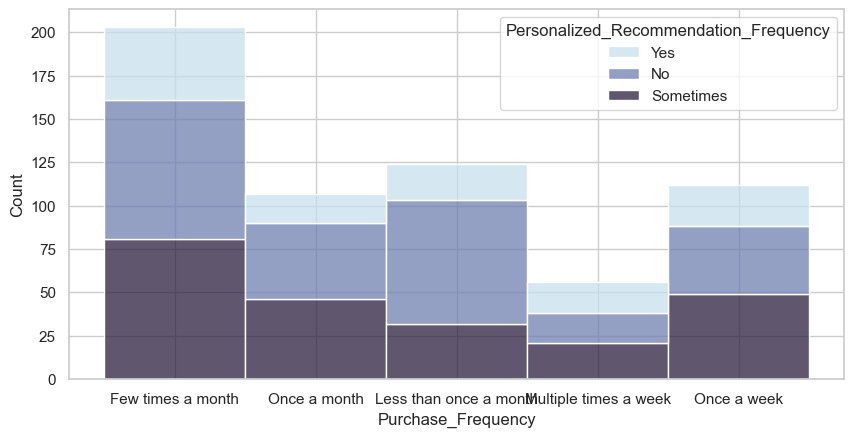

In [173]:
### Analyze the frequency of receiving personalized product recommendations 

plt.figure().set_figwidth(10)
sns.histplot(binwidth=0.5, x="Purchase_Frequency", hue="Personalized_Recommendation_Frequency", data=data, stat="count", multiple="stack", palette = "ch:s=.25,rot=-.25" )
plt.show()

>**Obervation**: Through visualization we can see that personalized recommendation does not impact purchase 

In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype                                 
---  ------                                  --------------  -----                                 
 0   Timestamp                               602 non-null    datetime64[ns, pytz.FixedOffset(-330)]
 1   age                                     602 non-null    int64                                 
 2   Gender                                  602 non-null    object                                
 3   Purchase_Frequency                      602 non-null    object                                
 4   Purchase_Categories                     602 non-null    object                                
 5   Personalized_Recommendation_Frequency   602 non-null    object                                
 6   Browsing_Frequency                      602 non-null    object                            

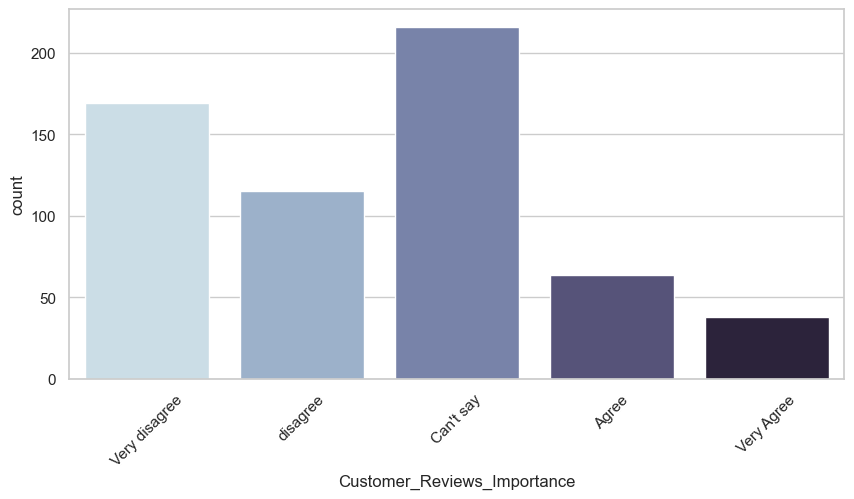

In [175]:
### Examine the importance of customer reviews and reliance on them

plt.figure().set_figwidth(10)
cust_review = sns.countplot( x="Customer_Reviews_Importance", data=data, palette = "ch:s=.25,rot=-.25" )
cust_review.set_xticklabels(labels=['Very disagree', 'disagree', "Can't say", 'Agree', 'Very Agree'], rotation=45)
plt.show()

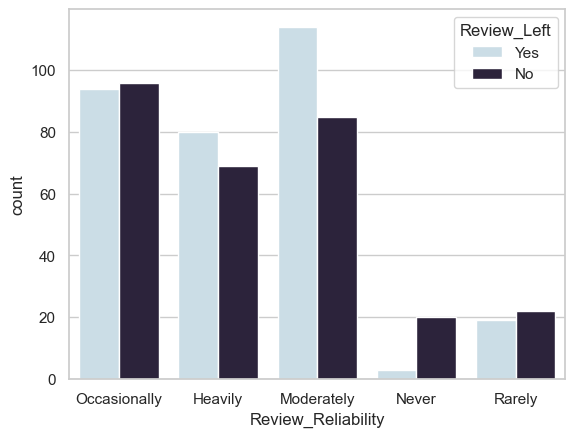

In [176]:
sns.countplot(x='Review_Reliability',data=data ,hue='Review_Left', palette = "ch:s=.25,rot=-.25")
plt.show()

> **observation**: Based on the graph, it appears that individuals who are satisfied with a product or service are more likely to leave a review. The graph shows that those who have rated their experience as "Very Satisfied" or "Satisfied" have a higher frequency of leaving reviews. On the other hand, individuals who are not satisfied or have average opinions are less likely to leave a review.

###   <font color = #2E4053>Website Browsing and Service Appreciation</font>

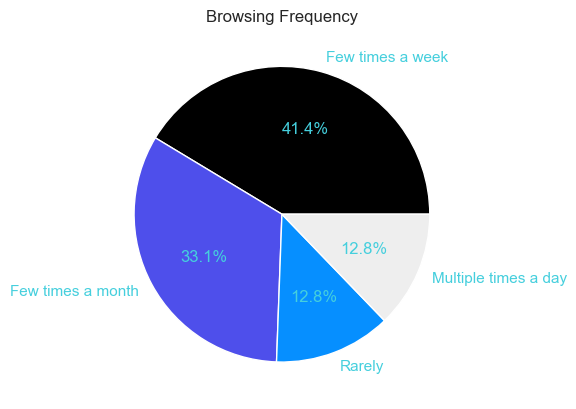

In [177]:
###  frequency of browsing Amazon's website or app

browsing_freq = data['Browsing_Frequency'].value_counts().plot.pie(colors = palette,  autopct='%1.1f%%',  textprops={'color':"#45CFDD"})
browsing_freq.set_title('Browsing Frequency')
browsing_freq.set_ylabel('')
plt.show()

>**Observation**: Most of the customer frequently visit Amazon site, few times a week which suggest that customers are always onlooks on deals and discounts


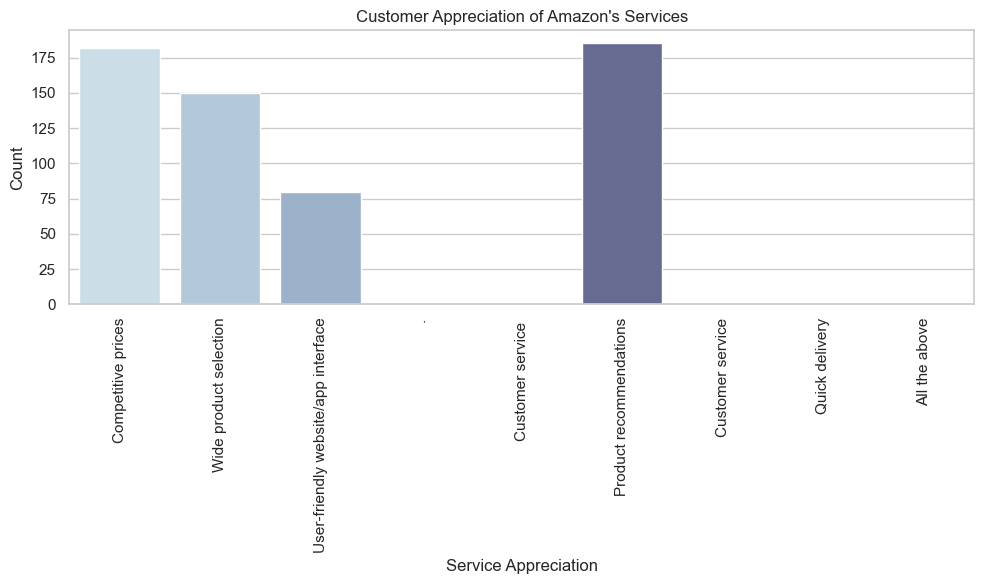

In [178]:
### Identify the aspects of Amazon's services that customers appreciate the most

plt.figure(figsize=(10, 6))
service_appreciation_plot = sns.countplot(x="Service_Appreciation", data=data, palette="ch:s=.25,rot=-.25")
service_appreciation_plot.set_xticklabels(service_appreciation_plot.get_xticklabels(), rotation=90)
plt.xlabel('Service Appreciation')
plt.ylabel('Count')
plt.title("Customer Appreciation of Amazon's Services")
plt.tight_layout()
plt.show()


>**Observation**: Customers like competative prizes offered by the Amazon marketplace and as well as Product recommendation facility


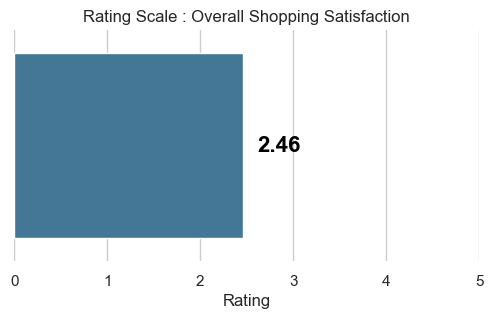

In [179]:
### Analyze overall shopping satisfaction 

# Calculate the average Shopping_Satisfaction
average_satisfaction = data['Shopping_Satisfaction'].mean()

# Set the style
sns.set(style="whitegrid")

# Create a horizontal bar plot to visualize the average Shopping_Satisfaction
plt.figure(figsize=(6, 3))  # Adjust the figure size as needed
ax = sns.barplot(x=[average_satisfaction], y=['Average Shopping Satisfaction'], palette='mako')
plt.xlabel('Rating')
plt.title('Rating Scale : Overall Shopping Satisfaction')
plt.xlim(0, 5)  # Set x-axis limit to match rating scale
plt.yticks([])  # Remove y-axis ticks

# Add the average value as text on the bar
for p in ax.patches:
    ax.annotate(format(average_satisfaction, ".2f"), 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                va = 'center', ha = 'left', 
                xytext = (10, 0), 
                textcoords = 'offset points',
                color='black', fontsize=16, fontweight='bold')

# Remove spines
sns.despine(left=True, bottom=True)

plt.show()

>**Observation**: From the visualization, it seems that shopping satisfaction of Amazon's customer is not up to standard stated by rating of 2.46. which idicates an average score.


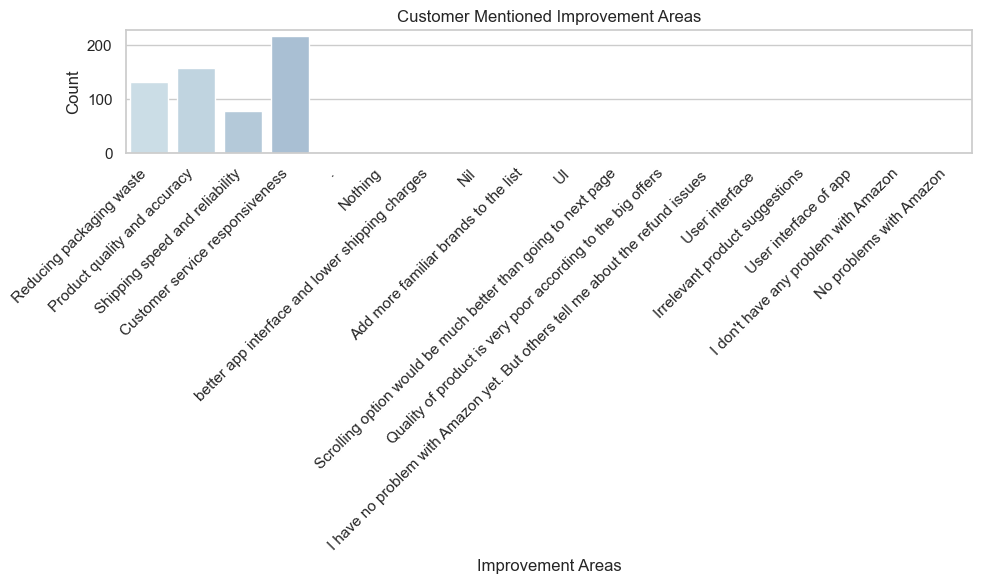

In [180]:
### Identify specific improvement areas

plt.figure(figsize=(10, 6))
improvement_areas_plot = sns.countplot(x="Improvement_Areas", data= data, palette="ch:s=.25,rot=-.25")
improvement_areas_plot.set_xticklabels(improvement_areas_plot.get_xticklabels(), rotation=45, ha="right")
plt.xlabel('Improvement Areas')
plt.ylabel('Count')
plt.title('Customer Mentioned Improvement Areas')
plt.tight_layout()
plt.show()

>**Observation**: Visualization shows that improvement is needed in Customer service reponse and product delivery issues


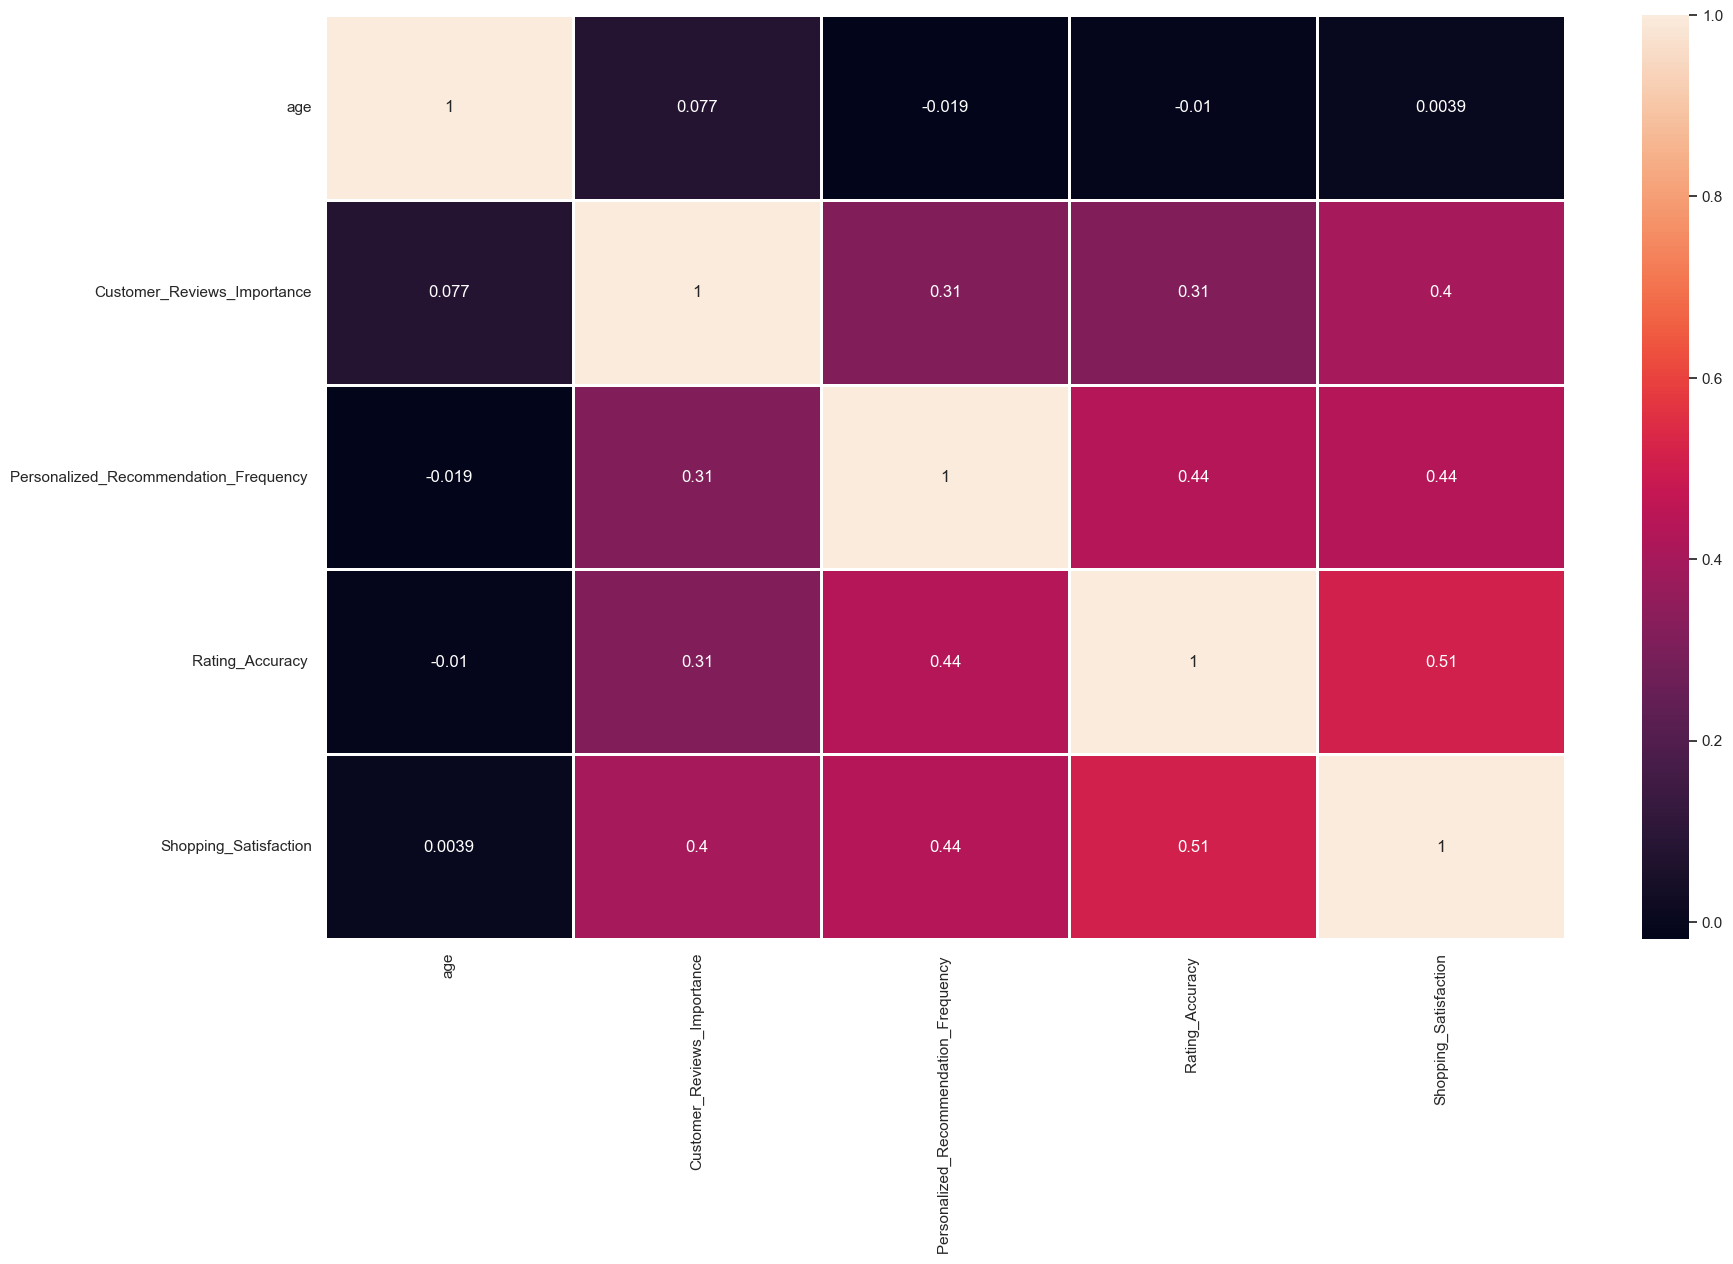

In [181]:
#correlation between variables
#heat map
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1,figsize=(20,12))
sns.heatmap(data.corr(),annot=True,linewidths=1)
plt.show()

In [182]:
#Calculate the correlation matrix
correlation_matrix = data.corr()

# Find features with low correlation
threshold = 0.0009  # Adjust the threshold as needed
low_correlated_features = np.where(np.abs(correlation_matrix) < threshold)

# Print the low correlated features
for feature1, feature2 in zip(low_correlated_features[0], low_correlated_features[1]):
    if feature1 != feature2:
        print(f"{data.columns[feature1]} and {data.columns[feature2]} are low correlated.")

In [183]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Find features with high correlation
threshold = 0.5  # Adjust the threshold as needed
highly_correlated_features = np.where(np.abs(correlation_matrix) > threshold)

# Print the highly correlated features
for feature1, feature2 in zip(highly_correlated_features[0], highly_correlated_features[1]):
    if feature1 != feature2:
        print(f"{data.columns[feature1]} and {data.columns[feature2]} are highly correlated.")

Purchase_Frequency and Purchase_Categories are highly correlated.
Purchase_Categories and Purchase_Frequency are highly correlated.


###   <font color = #2E4053>Insights and Recommendations</font>

Based on the Exploratory Data Analysis (EDA) conducted on the Amazon customer behavior dataset, several key findings and insights have been uncovered. These insights provide valuable information for Amazon to understand customer behavior, preferences, and areas for improvement. Here is a summary of the key findings along with actionable recommendations:

**Key Findings and Insights:**

1. **Gender Distribution:** Females represent 58.5% of buyers, while males account for 23.6%. This indicates a higher proportion of female customers on Amazon.

2. **Age Distribution:** The majority of customers fall within the age range of early 20s to late 40s, indicating a broad age demographic using Amazon's services.

3. **Purchase Frequency:** Most customers visit the Amazon website weekly, suggesting a frequent engagement with the platform.

4. **Browsing Behavior:** A significant proportion of customers browse Amazon's website or app often, demonstrating active exploration of products.

5. **Cart and Purchase Behavior:** While customers frequently add products to their carts during browsing, there might be room for improvement in increasing cart completion rates.

6. **Customer Reviews:** Customer reviews play a crucial role in the decision-making process, highlighting the importance of maintaining high-quality reviews and encouraging customers to leave reviews.

7. **Personalized Recommendations:** Customers often receive personalized product recommendations from Amazon. The effectiveness of these recommendations can impact purchasing decisions.

8. **Service Appreciation:** Identifying aspects of Amazon's services that customers appreciate the most can help enhance customer satisfaction and loyalty.

9. **Improvement Areas:** Customers have provided feedback on areas where Amazon can improve, suggesting opportunities for enhancing the overall shopping experience.

**Actionable Recommendations:**

1. **Enhance Personalization:** Amazon should continue refining its personalized product recommendation algorithms to provide more accurate and relevant suggestions to customers, thereby increasing the likelihood of conversion.

2. **Optimize Cart Conversion:** Analyze the factors influencing cart abandonment and take steps to minimize them. Offering incentives, improving the checkout process, and providing clear information about shipping and returns could boost cart completion rates.

3. **Encourage Customer Reviews:** Actively encourage customers to leave reviews by offering incentives or rewards for feedback. High-quality and helpful reviews can influence other customers' purchasing decisions.

4. **Improve User Experience:** Regularly update and optimize the user interface of the website and app to ensure seamless browsing and shopping experiences. A user-friendly interface can enhance engagement and satisfaction.

5. **Invest in Customer Service:** Strengthen customer service channels to address any issues promptly and provide support throughout the shopping journey. Happy customers are more likely to become repeat buyers.

6. **Focus on High-Appreciation Services:** Identify the specific aspects of Amazon's services that customers appreciate the most and highlight these in marketing campaigns and communication to further enhance brand loyalty.

7. **Address Improvement Areas:** Act on the feedback provided by customers regarding areas where Amazon can improve. Prioritize and implement changes that address these concerns, thereby enhancing customer satisfaction.

8. **Diversify Product Categories:** Consider expanding product offerings in categories that are popular among customers. This can attract a wider range of customers and increase overall sales.

9. **Continuous Monitoring and Analysis:** Regularly monitor customer behavior data and conduct ongoing EDA to stay updated on changing trends and preferences. This will enable Amazon to adapt its strategies accordingly.

By implementing these actionable recommendations based on the EDA insights, Amazon can improve customer satisfaction, increase conversion rates, and strengthen its competitive position in the e-commerce market.